2) Use CC_GENERAL.csv given in the folder and apply:
a) Preprocess the data by removing the categorical column and filling the missing values.
b) Apply StandardScaler() and normalize() functions to scale and normalize raw input data.
c) Use PCA with K=2 to reduce the input dimensions to two features.
d) Apply Agglomerative Clustering with k=2,3,4 and 5 on reduced features and visualize
result for each k value using scatter plot.
e) Evaluate different variations using Silhouette Scores and Visualize results with a bar chart.

In [32]:
import pandas as panda # importing pandas as panda
import numpy as nump # importing numpy as nump
from sklearn.preprocessing import StandardScaler,normalize # importing StandardScaler, normalize from sklearn.preprocessing
from sklearn.decomposition import PCA # importing PCA from sklearn.decomposition
from sklearn.metrics import silhouette_score # importing silhouette_score from sklearn.metrics
from matplotlib import pyplot as plotpy # importing pyplot as plotpy from matplotlib
import warnings # importing warinings
warnings.filterwarnings('ignore') # to ignore all the warnings

In [33]:
data_set = panda.read_csv('D:\Machine Learning\Assignment 6\Dataset\CC GENERAL.csv') # reading CC GENERAL.csv from the local 
data_set.head() 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# a) Preprocess the data by removing the categorical column and filling the missing values.

In [34]:
data_set.fillna(data_set.mean(),axis=0,inplace=True) # replacing all the missing values with means 
drop = data_set.drop(columns=['CUST_ID','TENURE']) 
drop.head() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


# b) Apply StandardScaler() and normalize() functions to scale and normalize raw input data

In [35]:
scaler = StandardScaler() # creating a StandardScalar
scaler.fit(drop) 
scaled_data = scaler.transform(drop) # scaling the data_set 
a = panda.DataFrame(scaled_data, columns = drop.columns) 
a.head() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551


In [36]:
norm = normalize(a) # normalizing  data_set
aft_norm = panda.DataFrame(norm,columns = drop.columns) 
aft_norm.head() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-0.315690,-0.107575,-0.183249,-0.153937,-0.150549,-0.201314,-0.347820,-0.292690,-0.305047,-0.291262,-0.205318,-0.220526,-0.414212,-0.228136,-1.341129e-01,-0.226658
1,0.221051,0.037731,-0.131893,-0.100260,-0.127687,0.731894,-0.343182,-0.190630,-0.257577,0.161222,0.030919,-0.166231,0.193433,0.229950,2.508654e-02,0.065792
2,0.127349,0.147556,-0.030665,0.031013,-0.129468,-0.132945,0.361664,0.761426,-0.261170,-0.192346,-0.135590,-0.031050,0.235271,-0.109312,-2.895472e-02,-0.149682
3,0.020828,-0.431402,0.098441,0.231699,-0.192836,-0.156386,-0.430202,-0.169395,-0.388999,-0.109834,-0.139792,-0.233979,0.350424,-0.253970,2.069426e-17,-0.222944
4,-0.153387,0.221496,-0.197546,-0.148479,-0.194345,-0.199565,-0.433569,-0.170721,-0.392043,-0.288732,-0.203534,-0.235810,-0.387113,-0.155778,-1.136337e-01,-0.224689


# c) Use PCA with K=2 to reduce the input dimensions to two features.

In [37]:
pc_data = PCA(n_components=2) # creating PCA with with k= 2
pc_final = pc_data.fit_transform(aft_norm) # giving the data to PCA

pd = panda.DataFrame(data = pc_final, columns = ['principal component 1', 'principal component 2'])
value = panda.concat([pd, data_set[['TENURE']]], axis = 1)
value.head() # displaying data

,principal component 1,principal component 2,TENURE
0,-0.488186,-0.677234,12
1,-0.517294,0.556075,12
2,0.334384,0.287313,12
3,-0.486616,-0.080777,12
4,-0.562175,-0.474770,12


# d) Apply Agglomerative Clustering with k=2,3,4 and 5 on reduced features and visualize
### result for each k value using scatter plot.

In [38]:
p_scat= value.drop('TENURE',axis=1) 
x_scat = value['TENURE'] 

In [39]:
from sklearn.cluster import AgglomerativeClustering 
list_data = [2,3,4,5] # creating the list 
sol = [] 
for i in list_data: 
    fee_data = AgglomerativeClustering(i).fit(p_scat,x_scat) 
    fee_pred= fee_data.fit_predict(p_scat) # predicting the data 
    sol.append(fee_pred) 

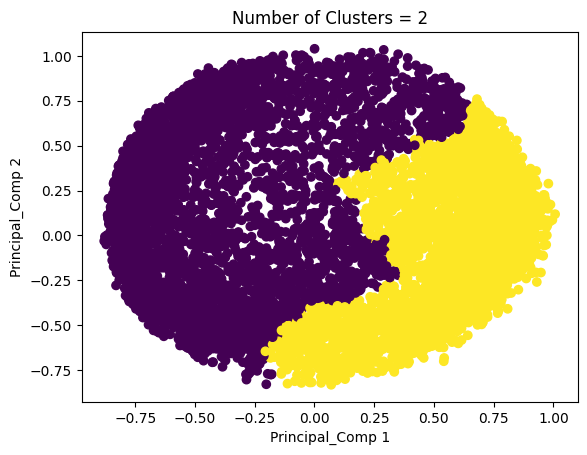

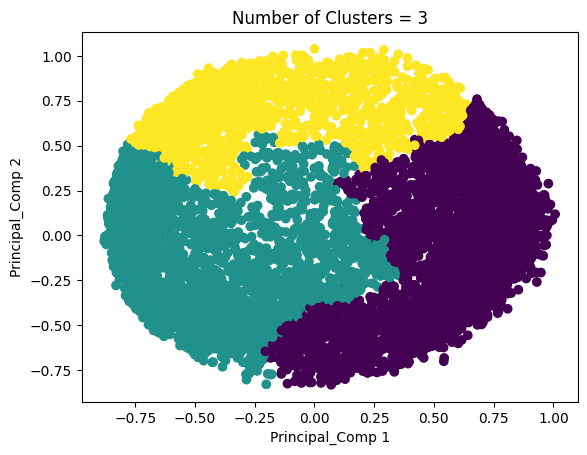

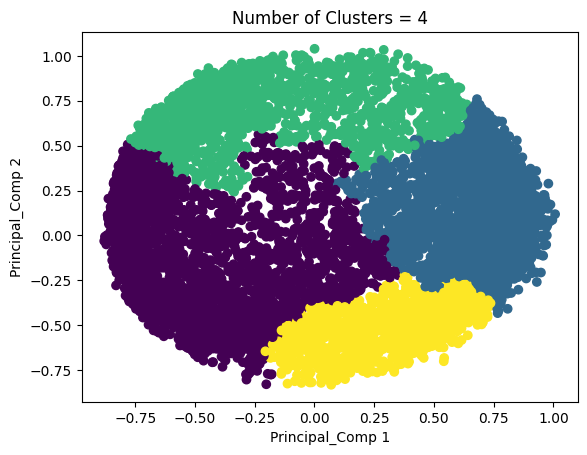

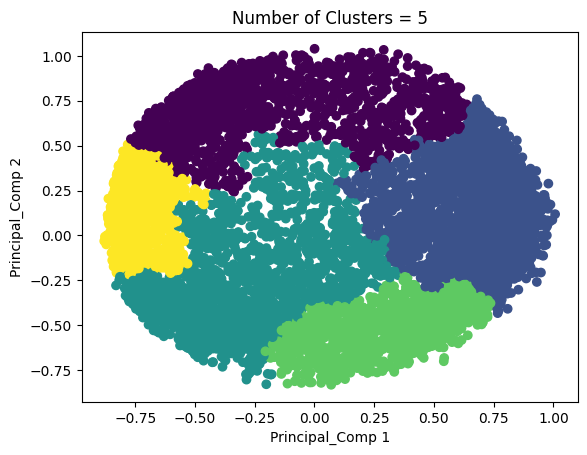

In [40]:
# plotting a scatter plot 
for i in sol: 
    plotpy.scatter(p_scat['principal component 1'],p_scat['principal component 2'],c = i)
    plotpy.xlabel('Principal_Comp 1') #  x-axis label
    plotpy.ylabel('Principal_Comp 2') #  y-axis label
    plotpy.title(f'Number of Clusters = {len(nump.unique(i))}') # giving the title 
    plotpy.show() # showing the graph

# e) Evaluate different variations using Silhouette Scores and Visualize results with a bar chart.

In [41]:
score_sil = [] # creating empty list 
for i in sol: 
    score = silhouette_score(p_scat, i) # finding silhouette score
    score_sil.append(score) 
    print(f'Silhouette score for k = {len(nump.unique(i))} is {score}' ) #displaying silhouette scores

Silhouette score for k = 2 is 0.4041800963925733
Silhouette score for k = 3 is 0.41420549283227914
Silhouette score for k = 4 is 0.36982498751143883
Silhouette score for k = 5 is 0.32839629941619963


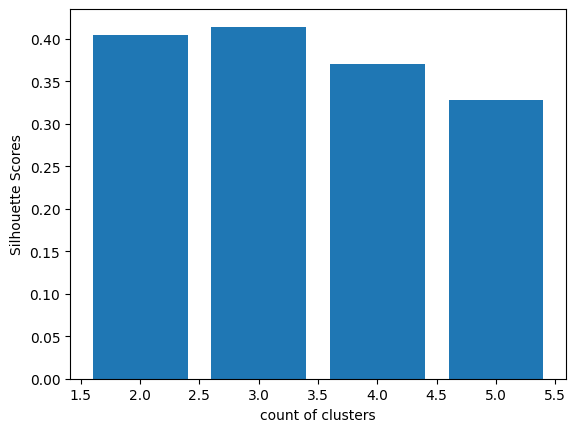

In [42]:
plotpy.bar([2,3,4,5],score_sil) # plotting bar chart between Number of clusters and silhouette scores
plotpy.xlabel('count of clusters') # x-axis
plotpy.ylabel('Silhouette Scores') # y-axis
plotpy.show() # showing the graph